<a href="https://colab.research.google.com/github/shinobu357/TugasMLRaisya/blob/main/UTS/Raisya_Athaya_Kamilah_101032380253_UTS_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression

# Importing Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UTS ML/RegresiUTSTelkom.csv')

# Display the first few rows of the dataset to understand its structure
df.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


# Menampilkan informasi umum pada dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515344 non-null  int64  
 1   49.94357    515344 non-null  float64
 2   21.47114    515344 non-null  float64
 3   73.0775     515344 non-null  float64
 4   8.74861     515344 non-null  float64
 5   -17.40628   515344 non-null  float64
 6   -13.09905   515344 non-null  float64
 7   -25.01202   515344 non-null  float64
 8   -12.23257   515344 non-null  float64
 9   7.83089     515344 non-null  float64
 10  -2.46783    515344 non-null  float64
 11  3.32136     515344 non-null  float64
 12  -2.31521    515344 non-null  float64
 13  10.20556    515344 non-null  float64
 14  611.10913   515344 non-null  float64
 15  951.0896    515344 non-null  float64
 16  698.11428   515344 non-null  float64
 17  408.98485   515344 non-null  float64
 18  383.70912   515344 non-null  float64
 19  32

# Menampilkan semua nama kolom pada dataset

In [ ]:
print(df.columns)

Index(['2001', '49.94357', '21.47114', '73.0775', '8.74861', '-17.40628',
       '-13.09905', '-25.01202', '-12.23257', '7.83089', '-2.46783', '3.32136',
       '-2.31521', '10.20556', '611.10913', '951.0896', '698.11428',
       '408.98485', '383.70912', '326.51512', '238.11327', '251.42414',
       '187.17351', '100.42652', '179.19498', '-8.41558', '-317.87038',
       '95.86266', '48.10259', '-95.66303', '-18.06215', '1.96984', '34.42438',
       '11.7267', '1.3679', '7.79444', '-0.36994', '-133.67852', '-83.26165',
       '-37.29765', '73.04667', '-37.36684', '-3.13853', '-24.21531',
       '-13.23066', '15.93809', '-18.60478', '82.15479', '240.5798',
       '-10.29407', '31.58431', '-25.38187', '-3.90772', '13.29258', '41.5506',
       '-7.26272', '-21.00863', '105.50848', '64.29856', '26.08481',
       '-44.5911', '-8.30657', '7.93706', '-10.7366', '-95.44766', '-82.03307',
       '-35.59194', '4.69525', '70.95626', '28.09139', '6.02015', '-37.13767',
       '-41.1245', '-8.40816

# Mengecek pada setiap kolom apakah ada yang mengandung missing value

In [ ]:
# Check for missing values
df.isnull().sum()

,0
2001,0
49.94357,0
21.47114,0
73.0775,0
8.74861,0
...,...
-23.08793,0
68.40795,0
-1.82223,0
-27.46348,0


# Exploratory Data Analysis (EDA) and Data Visualization

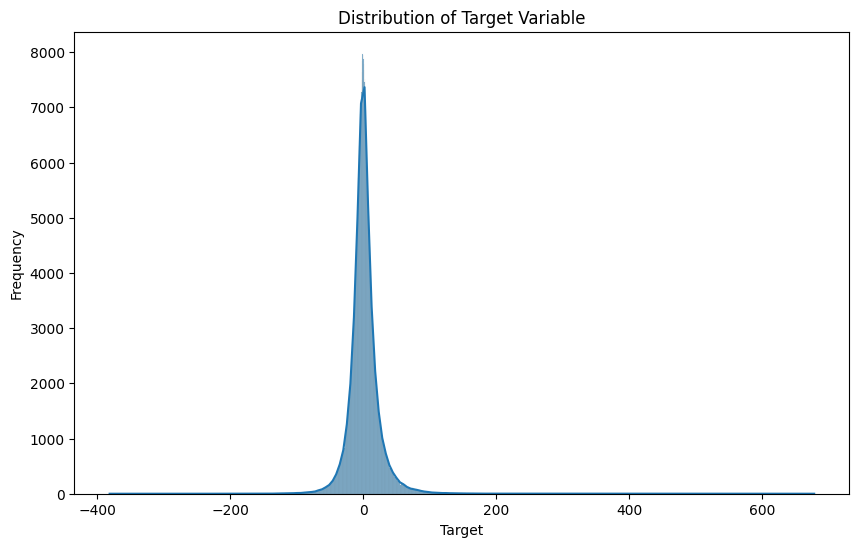

In [ ]:
# Step 3: Exploratory Data Analysis (EDA) and Data Visualization

# 3.1 Distribution of Target Variable
target_column = df.columns[-1]  # Assuming the last column is the target
y = df[target_column]
X = df.drop(columns=[target_column])

plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title("Distribution of Target Variable")
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.show()

Pada Distribusi Data kebanyakan terpusat di Nol yang berarti kemungkinan besar memiliki distribusi skewed (miring), dengan banyak nilai yang cenderung lebih kecil atau lebih dekat ke nol. Dan Distribusi Tidak Normal karena distribusinya terkonsentrasi di satu sisi dan tidak berbentuk lonceng (normal)

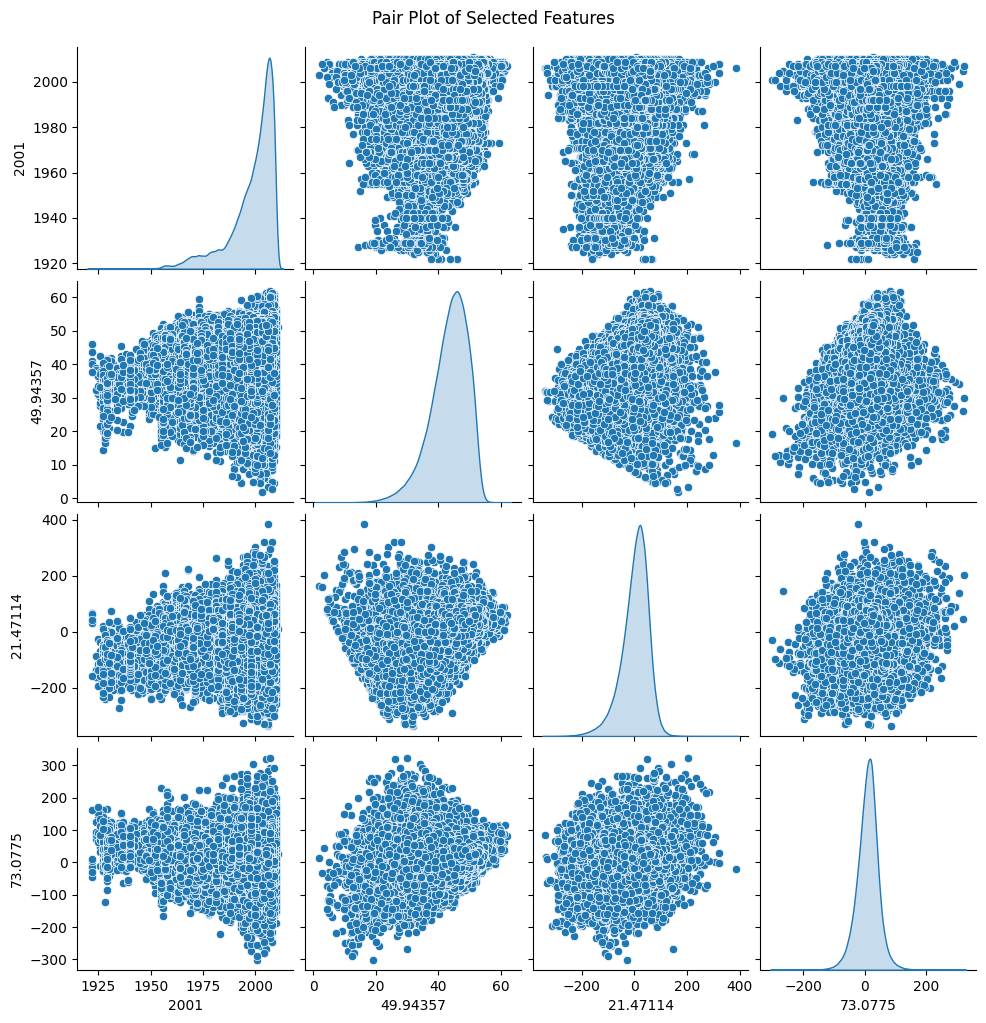

In [ ]:
# 3.2 Pair Plot of Important Features (select first few features for demonstration)
# Here, we are selecting the first 3 features and the target for visualization
important_features = df.iloc[:, :4]  # Taking first 3 features and target
sns.pairplot(important_features, diag_kind="kde")
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

Pada fitur 2001 menunjukkan distribusi miring dengan sebagian besar data terkonsentrasi pada nilai yang lebih rendah dan beberapa nilai yang sangat tinggi di sisi kanan. Fitur 49.94357 menunjukkan distribusi yang sangat miring ke kanan, dengan banyak nilai yang sangat rendah dan beberapa nilai ekstrem yang sangat tinggi.
Fitur '21.47114' dan '73.0775' memiliki distribusi yang lebih normal (kurang miring), menunjukkan lebih banyak data terdistribusi di sekitar nilai tengah.

Namun pada Fitur 2001 memiliki korelasi yang cukup kuat dengan '49.94357' dan '73.0775'. Fitur '49.94357' dan '73.0775' juga memiliki korelasi positif yang cukup tinggi.
Fitur '49.94357' dan '21.47114' tidak memiliki korelasi sangat kuat karena lebih tersebar.

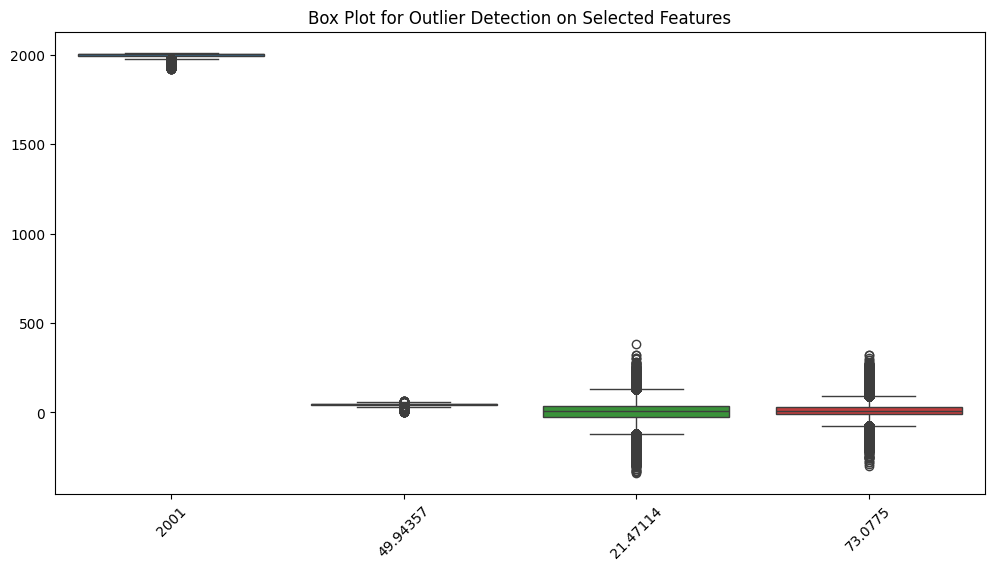

In [ ]:
# 3.3 Box Plot for Outlier Detection on Key Features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :4])  # Select first few features for boxplot
plt.title("Box Plot for Outlier Detection on Selected Features")
plt.xticks(rotation=45)
plt.show()


Pada fitur 2001 memiliki banyak outliers yang berarti adanya nilai ekstrem yang lebih tinggi daripada sebagian besar data lainnya.

Fitur '49.94357' Memiliki beberapa outliers di kedua sisi (kiri dan kanan), menandakan adanya nilai yang sangat rendah atau tinggi.

Fitur '21.47114' Tidak ada outliers besar pada fitur ini, yang menunjukkan data lebih terdistribusi normal.

Fitur '73.0775' Ada outliers pada sisi kanan, menunjukkan nilai yang sangat besar

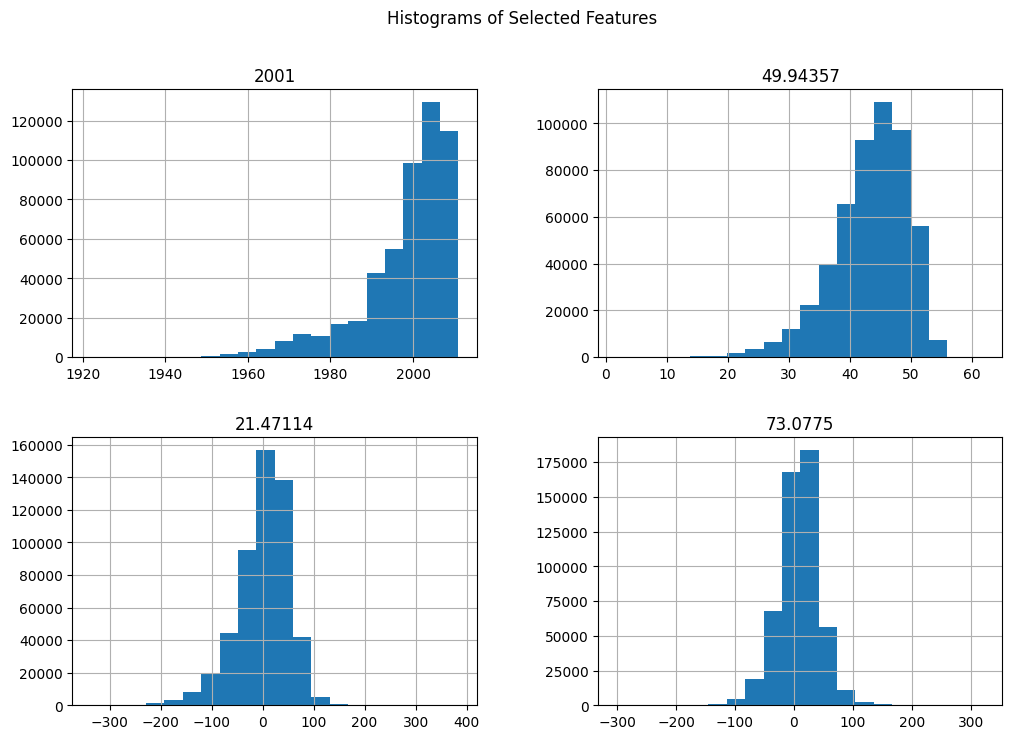

In [ ]:
# 3.4 Histograms of Selected Features
selected_features = df.columns[:4]  # Choose first 4 columns for demonstration
df[selected_features].hist(bins=20, figsize=(12, 8), layout=(2, 2))
plt.suptitle("Histograms of Selected Features")
plt.show()

Fitur '2001' memiliki distribusi sangat miring ke kanan Sebagian besar data terkonsentrasi pada nilai tahun yang lebih rendah, dengan lonjakan yang tajam setelah sekitar tahun 2000.

Fitur '49.94357' juga Distribusi miring ke kanan (right skewed), dengan puncak distribusi pada nilai sekitar 35-40. Namun Sebagian besar data terfokus pada nilai yang lebih rendah, dan ada beberapa nilai yang lebih tinggi yang lebih jarang (outliers).

Fitur '21.47114' Distribusi dengan pola mirip distribusi normal namun Ada sedikit nilai ekstrem di kedua sisi, tetapi mayoritas data terdistribusi di sekitar nilai 0


Fitur '73.0775' Distribusi miring ke kanan (right skewed). Sebagian besar data terkonsentrasi pada nilai yang lebih rendah (sekitar 0-100), dengan sedikit data yang lebih tinggi (outliers di sisi kanan)

In [ ]:
# Step 3: Define target and select relevant features based on EDA
# Use the last column as the target, excluding '2001' if it's not relevant numerically
target_column = df.columns[-1]
selected_features = ['49.94357', '21.47114', '73.0775']  # Features with clear distributions

X = df[selected_features]
y = df[target_column]
print("\nFeatures and target variable defined.\n")


Features and target variable defined.



In [ ]:
# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}\n")




Training data: (412275, 3), Testing data: (103069, 3)



In [ ]:
def evaluate_model(model, model_name):
    print(f"\nTraining and tuning {model_name}...")
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Mean Squared Error (MSE): {mse}")
    print(f"{model_name} Root Mean Squared Error (RMSE): {rmse}")
    print(f"{model_name} R^2 Score: {r2}")

    # Visualize actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
    plt.xlabel("Actual Target Values")
    plt.ylabel("Predicted Target Values")
    plt.title(f"Actual vs Predicted Values ({model_name})")
    plt.show()



Training and tuning Polynomial Regression...
Polynomial Regression Mean Squared Error (MSE): 452.44972549756955
Polynomial Regression Root Mean Squared Error (RMSE): 21.270865649934642
Polynomial Regression R^2 Score: 0.07095244874873963


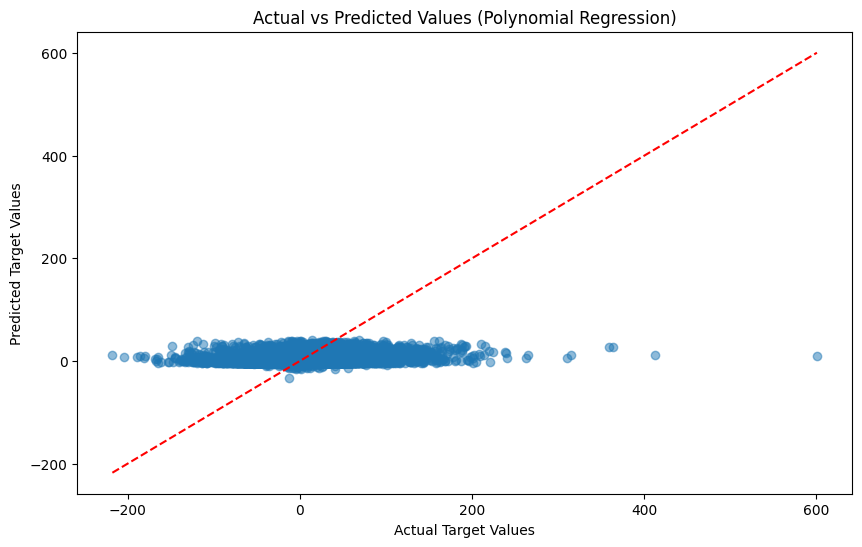

In [ ]:
polynomial_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Evaluate Polynomial Regression
evaluate_model(polynomial_pipeline, "Polynomial Regression")

model kesulitan dalam memprediksi nilai-nilai yang lebih tinggi dari target. Titik data cenderung terkonsentrasi pada bagian bawah grafik (nilai prediksi mendekati nol), yang menandakan bahwa model tidak dapat menangkap variabilitas yang besar pada target yang lebih tinggi.

Nilai MSE Besar yang berarti bahwa model tidak sangat akurat dalam memprediksi data. RMSE juga menunjukkan kesulitan membedakan prediksi dan actual. Dan memiliki nilai R^2 hanya dapat menjelaskan sekitar 7% dari variabilitas data. Dengan kata lain, model ini tidak cukup baik dalam menjelaskan hubungan antara fitur dan target. Model underfitting karena terlalu sederhana untuk data yang lebih kompleks.


Training and tuning Decision Tree Regression...
Decision Tree Regression Mean Squared Error (MSE): 460.421577197265
Decision Tree Regression Root Mean Squared Error (RMSE): 21.457436407857884
Decision Tree Regression R^2 Score: 0.05458327249960948


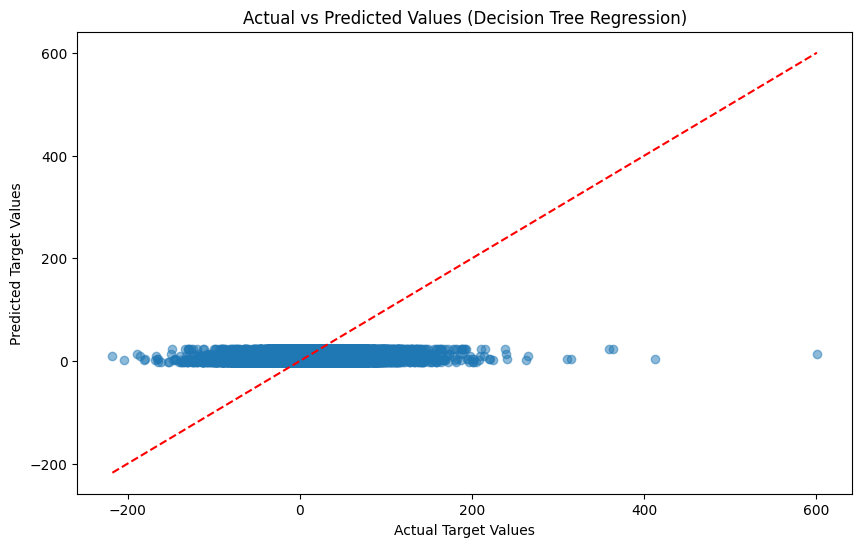

In [ ]:
# Step 6: Decision Tree Pipeline
decision_tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(max_depth=3))  # Set max_depth to control overfitting
])

# Evaluate Decision Tree Regression
evaluate_model(decision_tree_pipeline, "Decision Tree Regression")

Plot persebaran menunjukkan bahwa prediksi model sangat terpusat di sekitar nilai 0 . Model ini gagal menangkap variabilitas yang lebih tinggi dari nilai target. Nilai MSE sangat tinggi yang berarti kurang akurat dalam prediksi. Pada RMSE pun masih kurang bisa membedakan prediksi dan aktual.
R² yang sekitar 5.5% menunjukkan bahwa model ini hanya mampu menjelaskan sekitar 5.5% dari variasi dalam dataset. Model juga underfitting


Training and tuning k-Nearest Neighbors (k-NN)...
k-Nearest Neighbors (k-NN) Mean Squared Error (MSE): 602.5315239108189
k-Nearest Neighbors (k-NN) Root Mean Squared Error (RMSE): 24.54651755159617
k-Nearest Neighbors (k-NN) R^2 Score: -0.23722129840046402


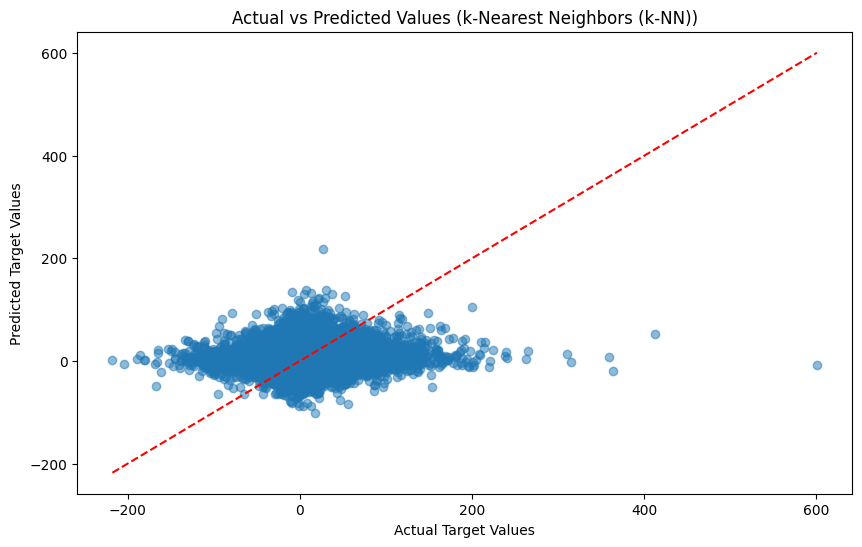

In [ ]:
# Step 7: k-Nearest Neighbors (k-NN) Pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', KNeighborsRegressor(n_neighbors=3))  # Set n_neighbors to balance complexity
])

# Evaluate k-NN Regression
evaluate_model(knn_pipeline, "k-Nearest Neighbors (k-NN)")

Sebagian besar nilai prediksi berkumpul pada nilai yang rendah (sekitar 0-200), meskipun beberapa nilai aktual mencapai lebih dari 400. Nilai MSE pun memiliki Error sangat besar dibanding dengan regressi lainnya, RMSE pun masih kurang bisa membedakan prediksi dan aktual. Nilai R^2 sangat buruk dalam menjelaskan variansi data dengan baik dibanding dengan regressi lainnya.


Training and tuning XGBoost Regression...
XGBoost Regression Mean Squared Error (MSE): 450.4859598759664
XGBoost Regression Root Mean Squared Error (RMSE): 21.22465452901334
XGBoost Regression R^2 Score: 0.07498478988890822


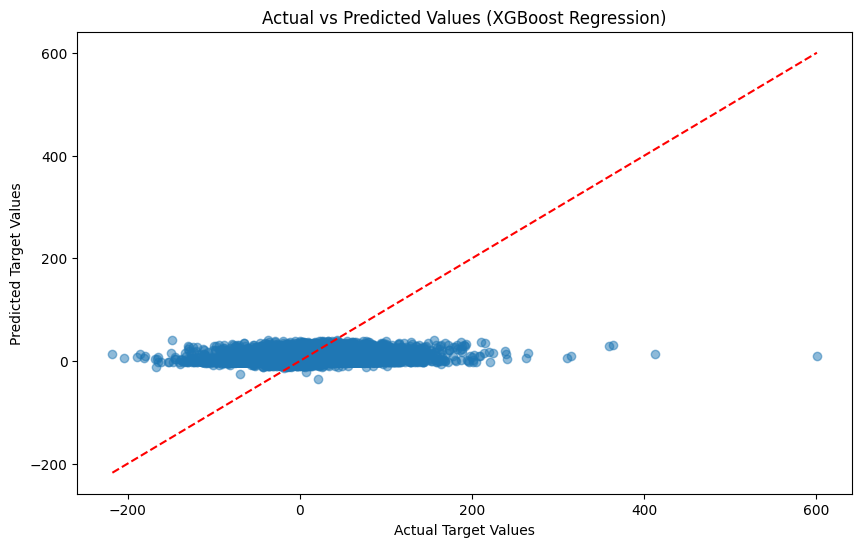

In [ ]:
# Step 8: XGBoost Pipeline
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor(max_depth=3, learning_rate=0.1))  # Set manageable depth and learning rate
])

# Evaluate XGBoost Regression
evaluate_model(xgb_pipeline, "XGBoost Regression")



Model ini pun menandakan bahwa model tidak dapat menangkap variabilitas yang besar pada target yang lebih tinggi. Nilai MSE masih errornya besar namun dibanding dengan regresi lain XGBOOST yang memiliki error terkecil. RMSE masih  pun masih kurang bisa membedakan prediksi dan aktual. Nilai R^2 di sekitar 7.4% yang berarti bahwa model ini hanya mampu menjelaskan sekitar 7.4% dari variasi dalam dataset tapi memiliki nilai R^2 paling tinggi dibanding dengan regressi lainnya.

# Kesimpulan

Dapat disimpulkan bahwa pada ke empat pipeline regressi untuk kasus dataset ini kebanyakan kurang cocok dan kurang mampu memperoleh nilai metrik yang lebih baik. Namun berdasarkan nilai metrik seperti MSE dan R^2 yang memiliki hasil terbaik untuk kasus dataset ini adalah pipeline XGBOOST Regression karena menggunakan teknik boosting untuk meningkatkan performa. Boosting bekerja dengan membangun model secara bertahap, memperbaiki kesalahan model sebelumnya pada setiap iterasi atau lebih efektif dalam menangani data yang kompleks. Dan perlu setting hyperparameter tuning lebih lanjut agar dapat memperoleh hasil nilai metrik yang lebih baik.